In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the data
df = pd.read_csv('restaurant_data.csv')

In [13]:
# Display the first few rows of the dataset
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [14]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [15]:
# Display basic statistics of the dataset
df.describe(include='all')

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
count,8368,8368,8368,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368,8368.000000,8368.000000,8.368000e+03
unique,8368,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,Restaurant 0,Downtown,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
freq,1,2821,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4189,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,NaN,29.491754,29.235301,6.560706e+05
std,NaN,NaN,NaN,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,NaN,20.025415,20.004277,2.674137e+05
min,NaN,NaN,NaN,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,NaN,0.000000,0.000000,1.847085e+05
25%,NaN,NaN,NaN,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,NaN,13.000000,13.000000,4.546514e+05
50%,NaN,NaN,NaN,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,NaN,27.000000,26.000000,6.042421e+05
75%,NaN,NaN,NaN,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,NaN,43.000000,43.000000,8.130942e+05


# Data Cleaning

## Handle missing values

In [17]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [18]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [19]:
# Verify that there are no missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64


## Convert data types if necessary

In [20]:
# Convert 'Rating' to numeric if it is not
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [21]:
# Convert 'Parking Availability' to boolean
df['Parking Availability'] = df['Parking Availability'].map({'Yes': True, 'No': False})

## Remove duplicate rows

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
# Verify the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability         bool
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object


# Data Visualization

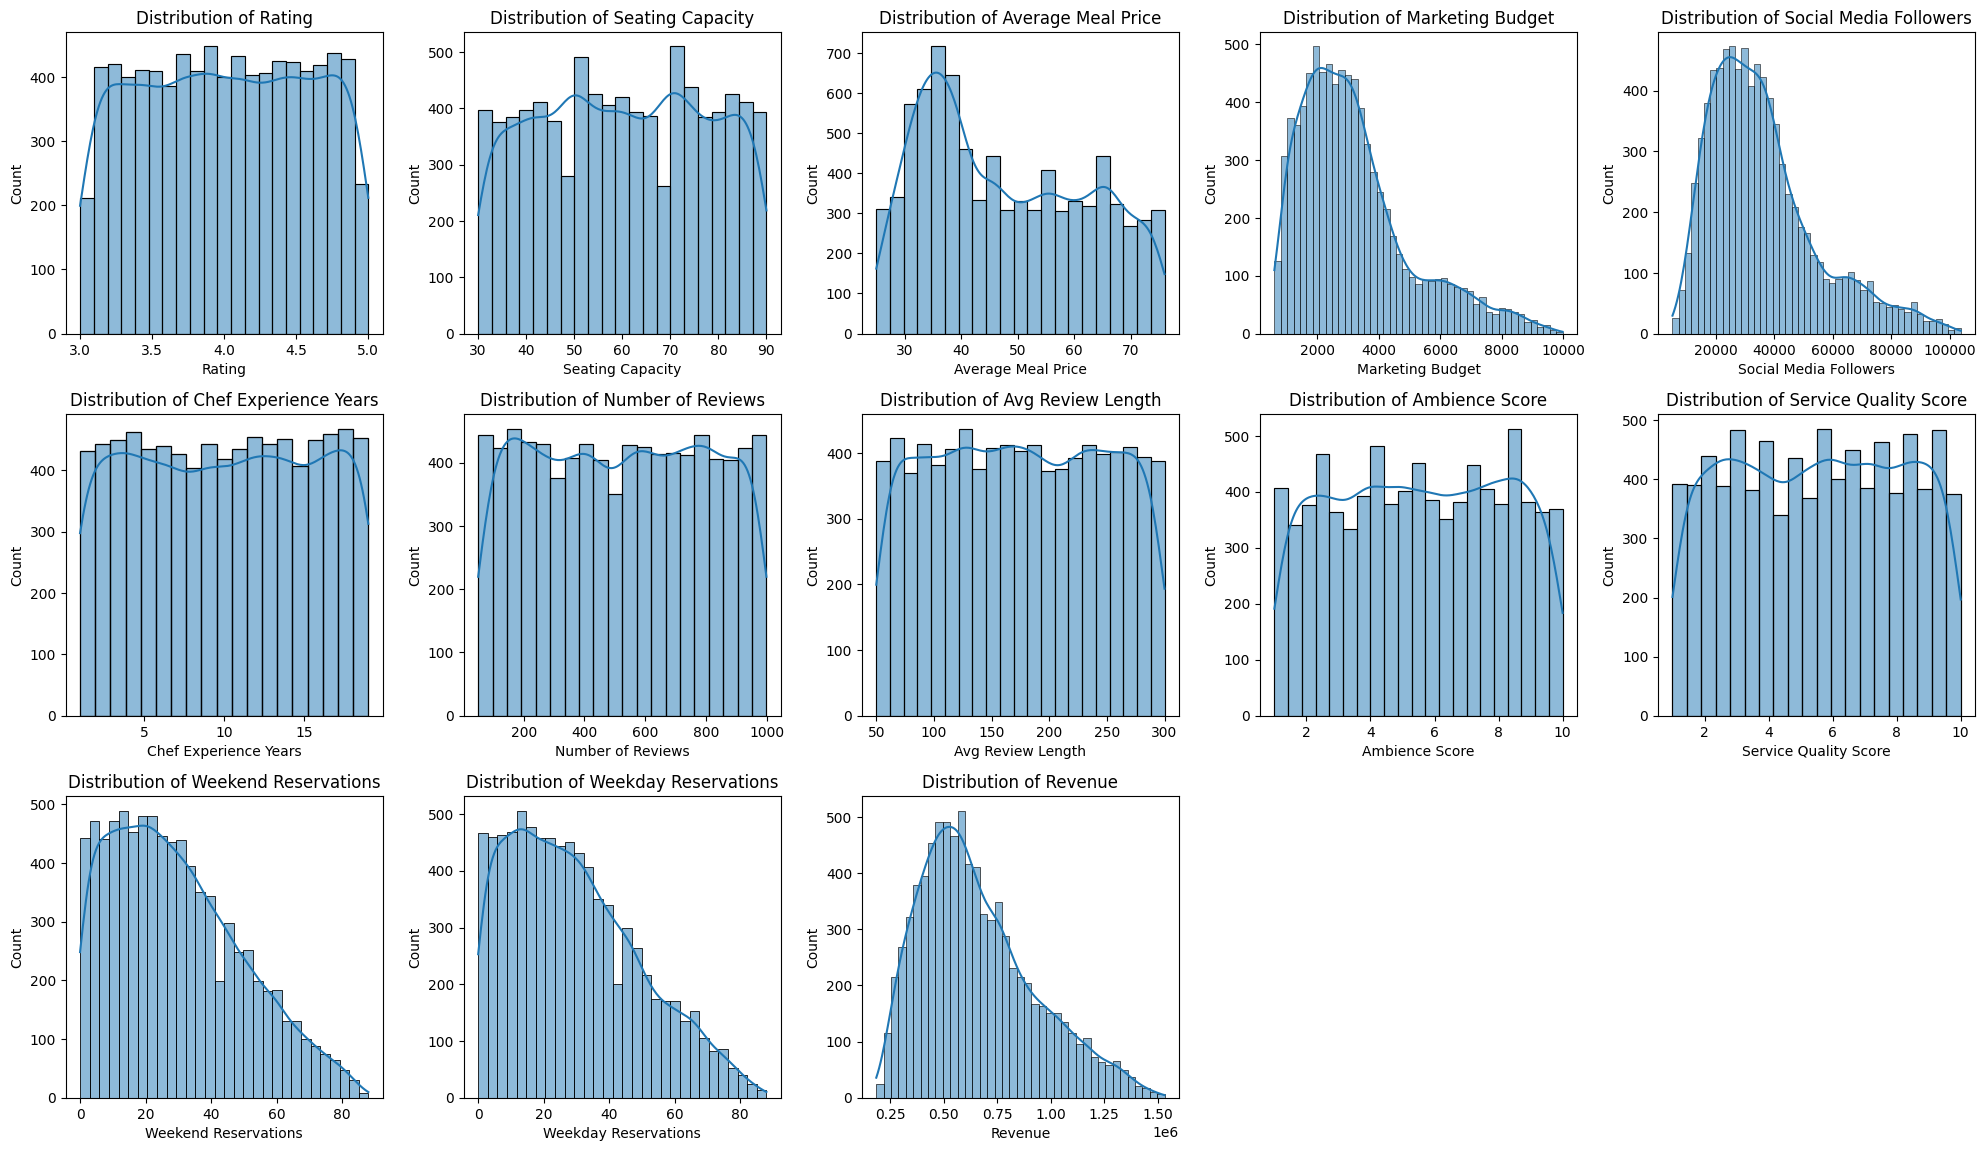

In [27]:
# Plotting the distribution of numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

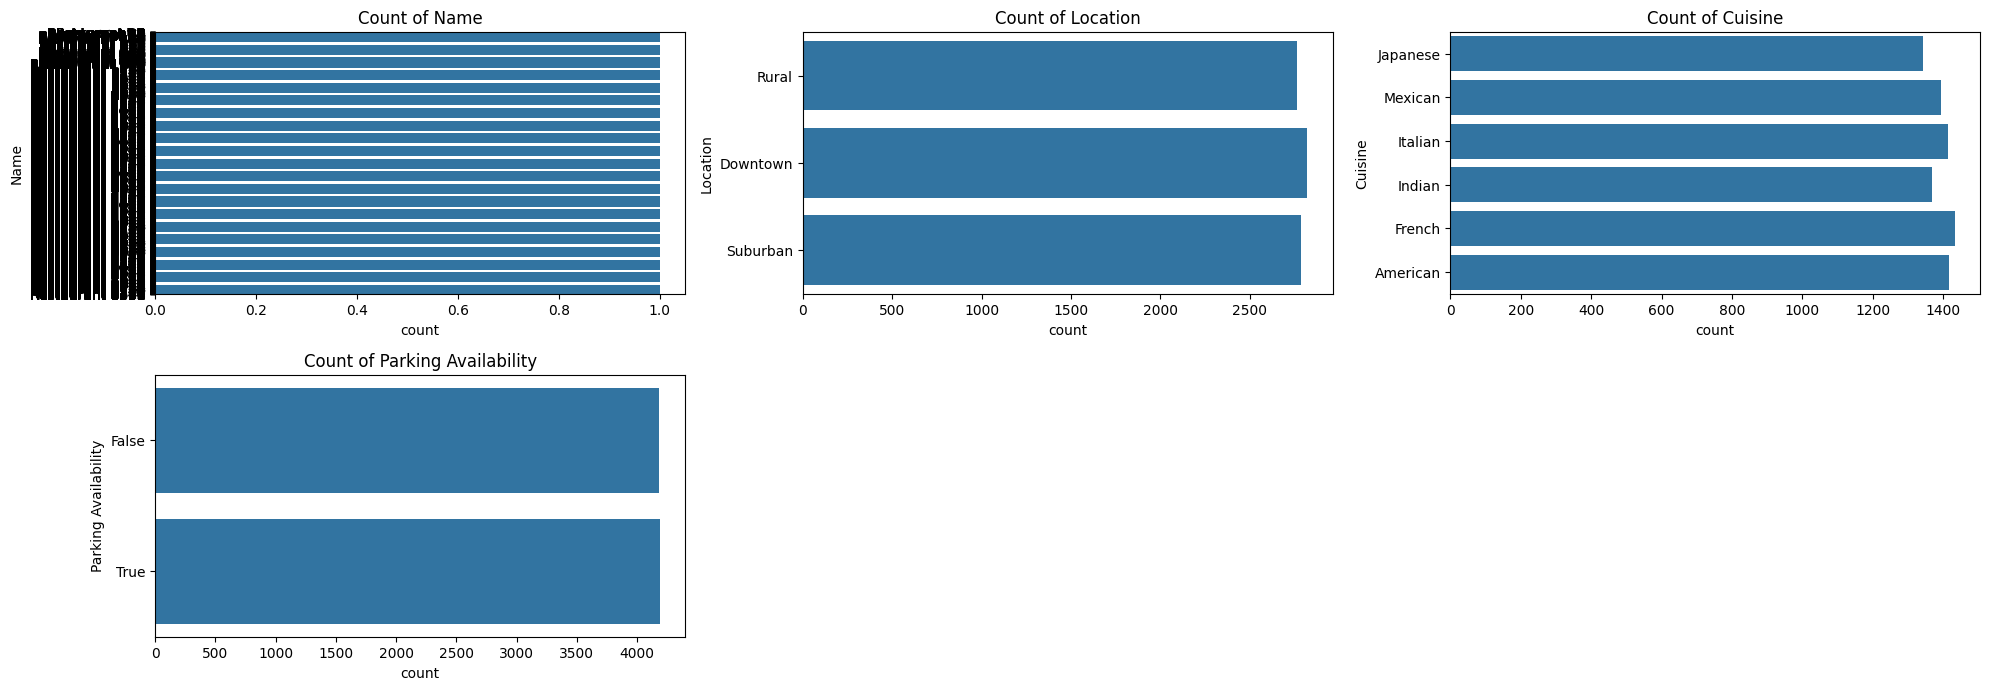

In [29]:
# Plotting the count of categorical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

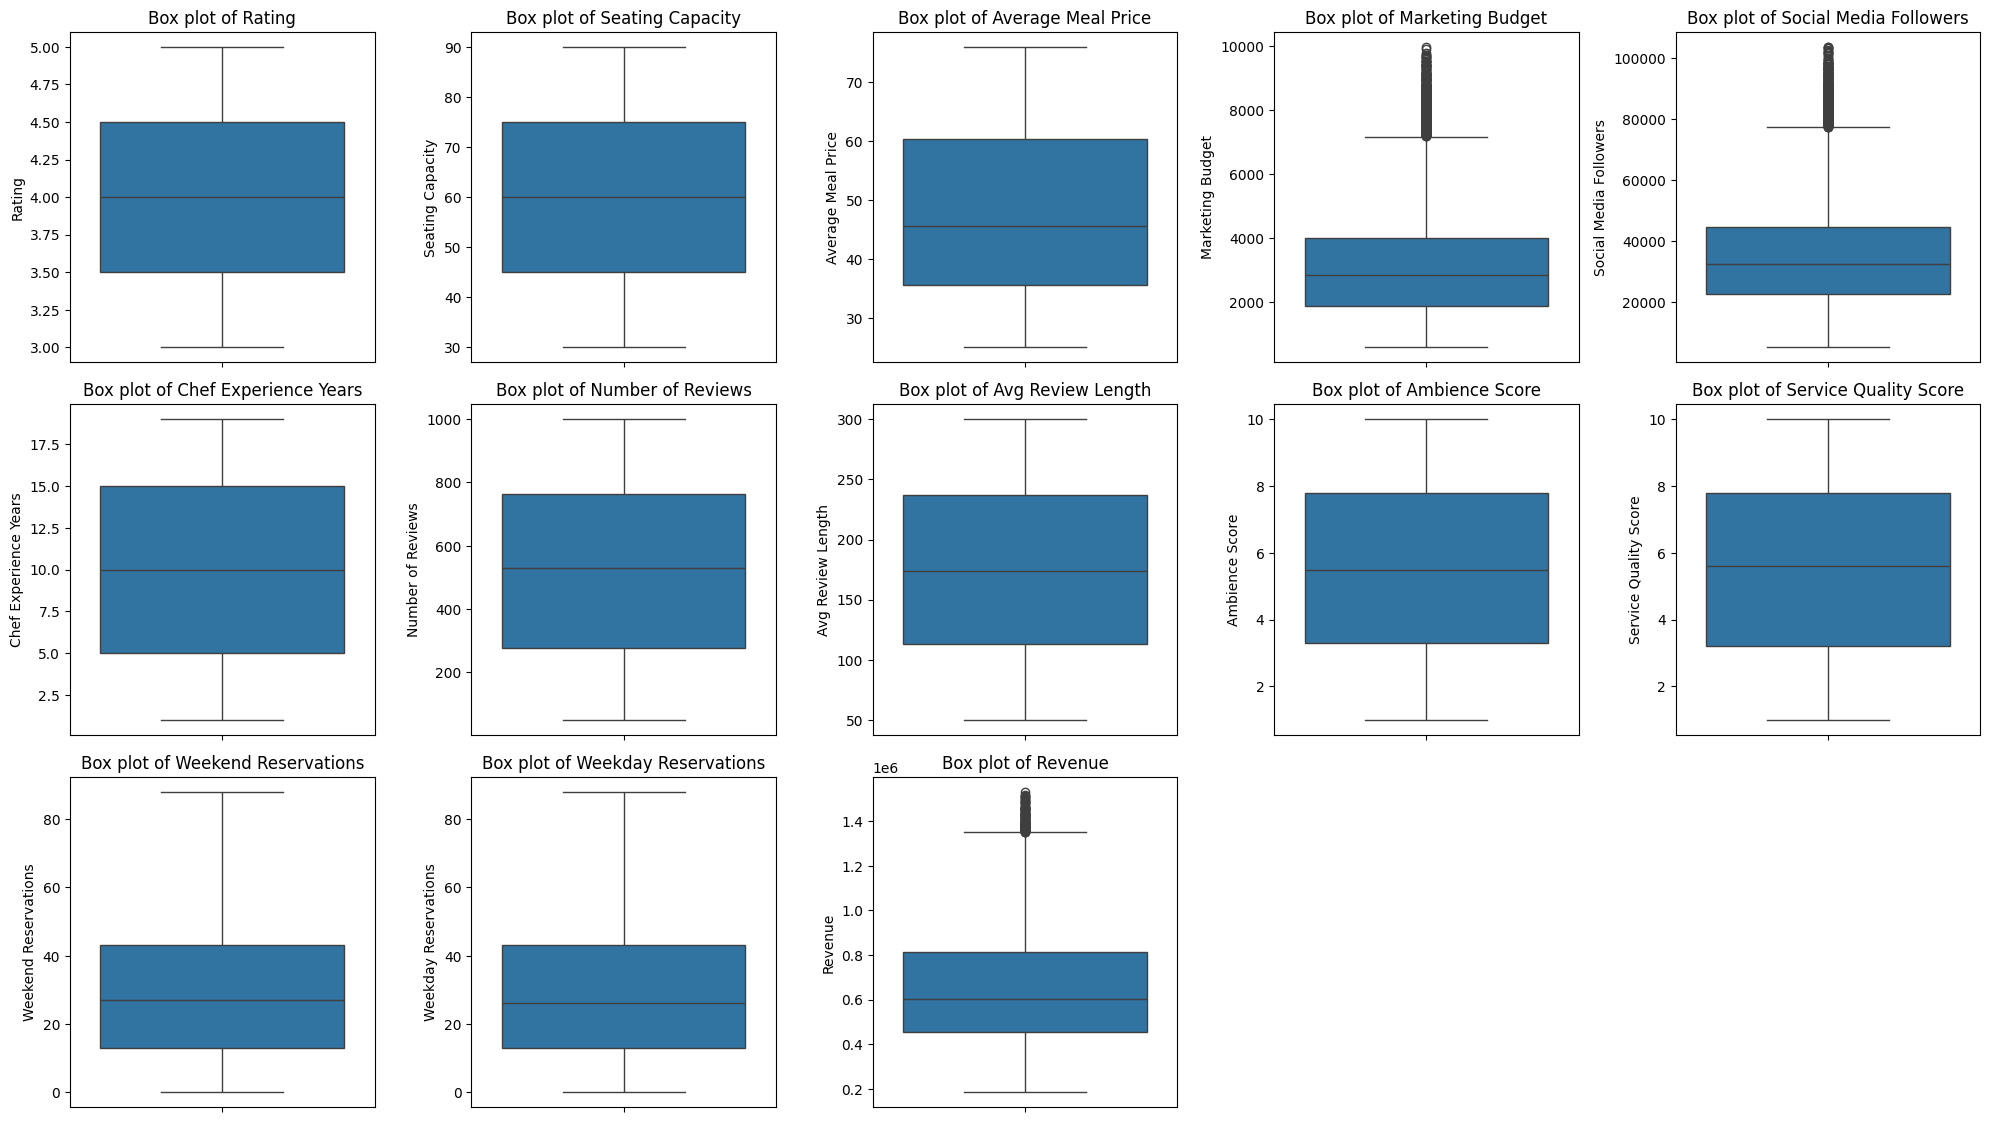

In [33]:
# Box plots for numerical features to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Outlier Detection and Removal

In [34]:
# Identify outliers using z-score
from scipy.stats import zscore

In [35]:
# Calculate z-scores
z_scores = np.abs(zscore(df[num_cols]))

In [36]:
# Set threshold for z-scores
threshold = 3

In [37]:
# Filter out the rows with any z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)
cleaned_data = df[~outliers]

In [38]:
# Verify the shape of the cleaned data
print("\nOriginal data shape:", df.shape)
print("Cleaned data shape:", cleaned_data.shape)


Original data shape: (8368, 17)
Cleaned data shape: (8249, 17)


In [39]:
# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_restaurant_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_restaurant_data.csv'")


Cleaned data saved to 'cleaned_restaurant_data.csv'
